In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import dataset

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

Add class column

In [3]:
math_df['class'] = 'math'
por_df['class'] = 'portuguese'

Concatenate student performance data into one dataset

In [4]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = data['G3'] >= 15
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,class,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,math,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,math,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,portuguese,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,portuguese,True
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,portuguese,False
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,portuguese,False


Preprocess data for decision tree

In [5]:
from sklearn import preprocessing
values = data.values
le = preprocessing.LabelEncoder()
for i in range(35):
    values[:,i] = le.fit_transform(values[:,i])
    
tree_data = pd.DataFrame(values)

Split data into training and test

In [6]:
train, test = train_test_split(tree_data, train_size=0.75)

In [7]:
X_train = train.iloc[:, np.r_[0:30, 33]]
y_train = train.iloc[:,34:35]
X_test = test.iloc[:, np.r_[0:30, 33]]
y_test = test.iloc[:, 34:35]
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

Decision Tree Classifier

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image

In [9]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))
    return model.score(test_x, test_y)

In [10]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
printTreeData(tree_model, X_train, y_train, X_test, y_test)

Tree depth: 17
Total leaves: 145
Feature importance: [0.04404275 0.02472966 0.04269356 0.00836886 0.00558337 0.01780137
 0.05239051 0.03956923 0.00837505 0.04414187 0.02375468 0.02402509
 0.01749986 0.03459132 0.02949291 0.02680527 0.         0.04762599
 0.02649157 0.01612713 0.         0.00977089 0.01566013 0.03710708
 0.02871269 0.03877929 0.03785718 0.06796371 0.07252943 0.07226355
 0.08524603]
Train Score: 1.0
Test Score: 0.7241379310344828


0.7241379310344828

Display Tree

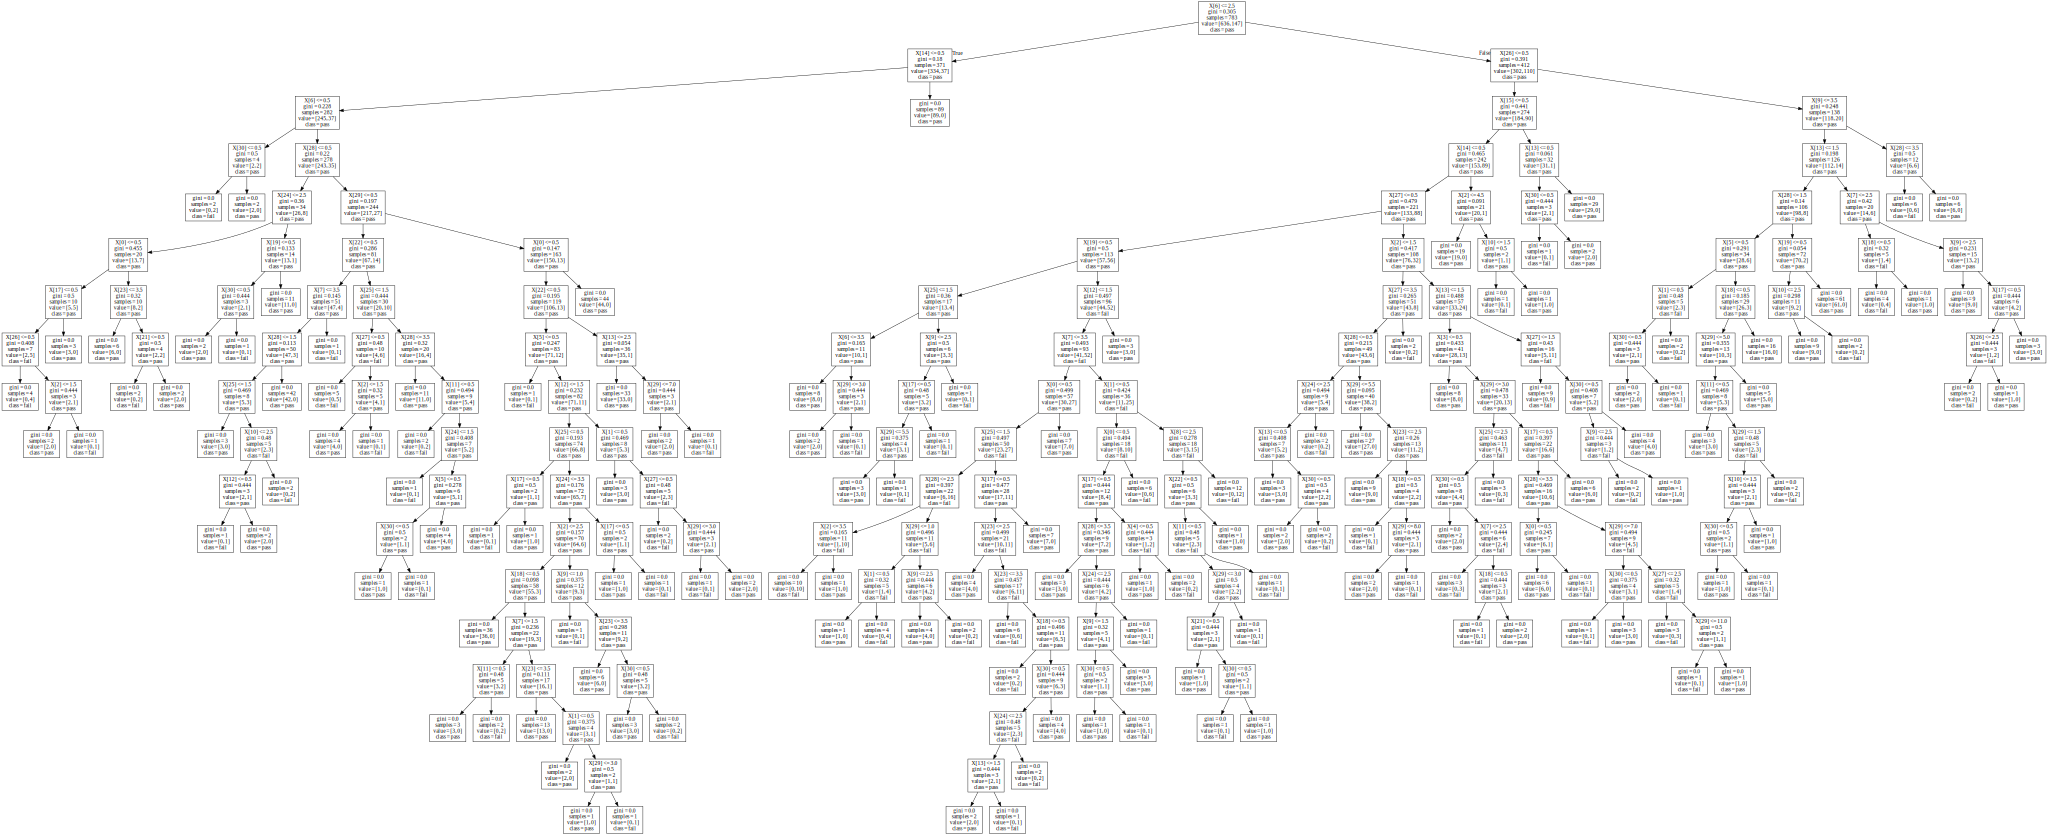

In [12]:
dot_data = tree.export_graphviz(tree_model, class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph